In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.15.0


In [4]:
# importing some necessary libraries :-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Split the dataset into independent and dependent features
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
X.shape

(10000, 10)

In [10]:
y.shape

(10000,)

In [11]:
# Feature engineering :-
# Perform feature encoding to create new features

In [12]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [13]:
# Note , we can denote these there geography by just two features,
geography = pd.get_dummies(X['Geography'],drop_first=True)

In [14]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [15]:
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [16]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [17]:
# concatenate these new features(variables) with existing dataset
# but before this , lets drop these 'Geography' and 'Gender' feature,
X.drop(['Gender','Geography'], axis = 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [18]:
# lets drop
X = X.drop(['Gender','Geography'], axis = 1)

In [19]:
# concatenate :-
X = pd.concat([X, geography, gender], axis = 1)

In [20]:
# Train and test split :-

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Feature scaling (converting features value into any specific range) :-
# ANN uses gradient descent, thus we need to perform it

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [24]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [25]:
# Create ANN

# necessary liberaries :-
from tensorflow.keras.models import Sequential # for creating container which contains neural network
from tensorflow.keras.layers import Dense # used to create neurons
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU # activation functions
from tensorflow.keras.layers import Dropout # use to reduce overfitting



In [26]:
# creating ANN architecture :-

classifier = Sequential()

In [27]:
# adding input layer to the sequentail container :-

classifier.add(Dense(units=10, activation = 'relu'))


In [28]:
# adding first hidden layer to the sequential container
classifier.add(Dense(units = 7, activation = 'relu'))

In [29]:
# adding second hidden layer to the sequentail container
classifier.add(Dense(units = 6, activation = 'relu'))

In [30]:
# adding output layer to the sequentail container
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [31]:
# training the entire neural network
# defining which type of optimizer , loss , metrics we need to use

classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [32]:
# defining the "early stopping" :-
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta= 0.001,
    patience= 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)



In [33]:
# training the neural network on our training dataset

model_history = classifier.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100, callbacks = early_stopping )

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 0.5346 - accuracy: 0.7794 - val_loss: 0.4815 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4560 - accuracy: 0.7983 - val_loss: 0.4417 - val_accuracy: 0.8027
Epoch 3/100
536/536 [==============================] - 5s 9ms/step - loss: 0.4220 - accuracy: 0.8212 - val_loss: 0.4247 - val_accuracy: 0.8194
Epoch 4/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3933 - accuracy: 0.8408 - val_loss: 0.3965 - val_accuracy: 0.8345
Epoch 5/100
536/536 [==============================] - 6s 11ms/step - loss: 0.3668 - accuracy: 0.8556 - val_loss: 0.3809 - val_accuracy: 0.8417
Epoch 6/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3527 - accuracy: 0.8593 - val_loss: 0.3719 - val_accuracy: 0.8466
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3456 - accuracy: 0.8630 - val_loss: 0.3674 - val_accuracy: 0.848

In [34]:
# model history :-

model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
# get the weights :-
classifier.get_weights

<bound method Model.get_weights of <keras.src.engine.sequential.Sequential object at 0x7be74181af50>>

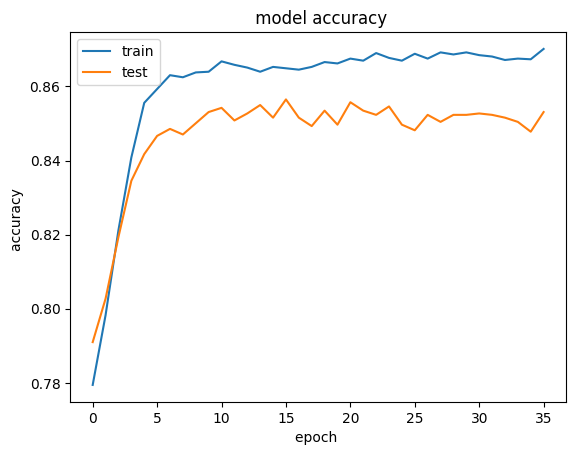

In [36]:
# summarizing history for accuracy :-

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title(" model accuracy")
plt.xlabel("epoch ")
plt.ylabel("accuracy ")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

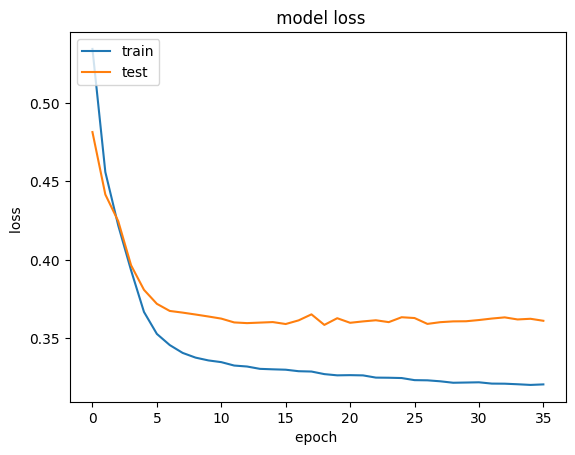

In [37]:
# summarizing history for loss :-

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title(" model loss")
plt.xlabel("epoch ")
plt.ylabel("loss ")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# making the prediction on test dataset

y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [39]:
# making the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1543,   64],
       [ 214,  179]])

In [40]:
# calculating the accuracy :-

from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.861

In [41]:
# Note we can also add dropout layer to handle overfitting

In [42]:
cf = Sequential()

# input layer
cf.add(Dense(units=10, activation = 'relu'))

# first hidden layer
cf.add(Dense(units = 8, activation = 'relu'))
cf.add(Dropout(0.2))

# second hidden layer
cf.add(Dense(units = 5, activation = 'relu'))
cf.add(Dropout(0.2))


# output layer
cf.add(Dense(units=1, activation = 'sigmoid'))

In [43]:
cf.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [44]:
model_history_cf = cf.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100, callbacks = early_stopping )

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 0.5457 - accuracy: 0.7895 - val_loss: 0.4871 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4847 - accuracy: 0.7962 - val_loss: 0.4612 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4573 - accuracy: 0.7962 - val_loss: 0.4487 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4528 - accuracy: 0.7974 - val_loss: 0.4397 - val_accuracy: 0.7948
Epoch 5/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4318 - accuracy: 0.8087 - val_loss: 0.4257 - val_accuracy: 0.8031
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4224 - accuracy: 0.8091 - val_loss: 0.4124 - val_accuracy: 0.8069
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4128 - accuracy: 0.8140 - val_loss: 0.4012 - val_accuracy: 0.8092

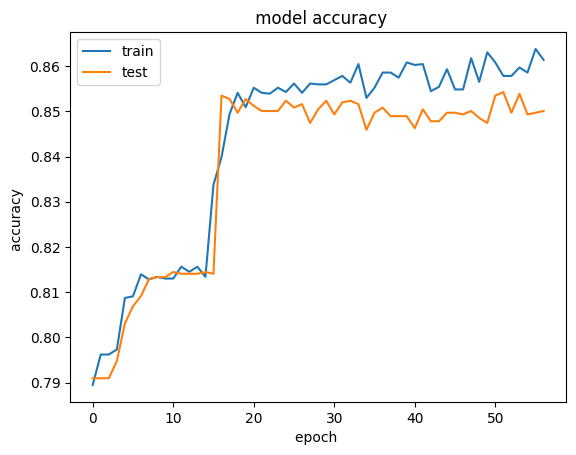

In [45]:
# summarizing history for accuracy :-

plt.plot(model_history_cf.history['accuracy'])
plt.plot(model_history_cf.history['val_accuracy'])
plt.title(" model accuracy")
plt.xlabel("epoch ")
plt.ylabel("accuracy ")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

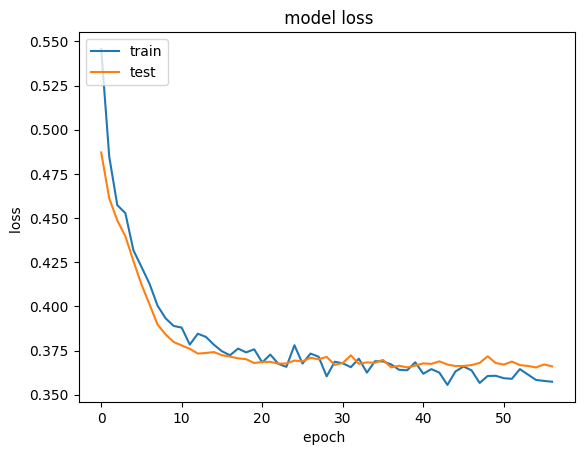

In [46]:
# summarizing history for loss :-

plt.plot(model_history_cf.history['loss'])
plt.plot(model_history_cf.history['val_loss'])
plt.title(" model loss")
plt.xlabel("epoch ")
plt.ylabel("loss ")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# making the prediction on test dataset

y_pred_cf = cf.predict(x_test)
y_pred_cf = (y_pred_cf > 0.5)

63/63 [==============================] - 0s 2ms/step


In [48]:
# making the confusion matrix

cm_cf = confusion_matrix(y_test, y_pred_cf)
cm_cf

array([[1540,   67],
       [ 208,  185]])

In [49]:

score_cf = accuracy_score(y_pred_cf, y_test)
score_cf

0.8625